# 我們使用最基礎的 Gradient Descent 方法來找到 W,b , 用來預測 PokenMon 升級後的 CP 值
* 主要的學習教材為台大電機系李弘毅教授的教材 : http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Linear%20Regression.mp4
* 這問題可以視為 Regression 問題 
* Gradient Descent 的推導會使用到基礎的微分觀念，不了解的話可以參考 : http://www.amath.nchu.edu.tw/~tdoc/4_2.htm

# 最終推導的結果如下圖
<img align="left" width="30%" src="./imgs/GradientDescent.png" />

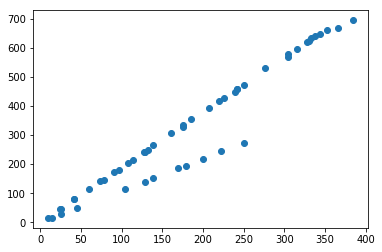

In [1]:
import numpy as np

import pandas as pd

pd = pd.read_csv("./pokemon.csv")
newcp = np.array(pd['cp_new'])
cp = np.array(pd['cp'])

cp = cp[:50]
newcp = newcp[:50]

import matplotlib.pyplot as plt
# plt.plot(newcp,cp)
plt.scatter(cp, newcp)
# plt.ylabel('some numbers')
plt.show()

In [2]:
w = 1
b = 1
n = len(cp)
r= 0.000001
for i in range(100000):
    dw = 0 
    db = 0
    error = 0
    for x , y in zip(cp,newcp):
        dw = -2*x*(y- (w*x+b))
        db = -2*(y- (w*x+b))
    #     print dw,db
        y_head = w*x + b

        w = w - dw*r 
        b = b - db*r

        error  +=(y_head-y)*(y_head-y)
    if i % 1000 ==0 :
        print w,b,error/n

1.53920699415 1.00099964784 6332.78374466
1.54682009246 0.254825391072 2755.72495494
1.55023890838 -0.472091446623 2746.11555914
1.55356943116 -1.18023518418 2737.02657222
1.55681394102 -1.87009064912 2728.43067431
1.55997465931 -2.54213014799 2720.30195873
1.56305374998 -3.19681378968 2712.61585948
1.56605332114 -3.83458980051 2705.34908231
1.56897542643 -4.45589483103 2698.4795394
1.57182206644 -5.06115425503 2691.9862874
1.57459519012 -5.65078246073 2685.84946856
1.57729669608 -6.22518313451 2680.05025494
1.5799284339 -6.78474953729 2674.57079545
1.58249220537 -7.32986477376 2669.39416564
1.58498976577 -7.86090205469 2664.50431998
1.58742282506 -8.37822495245 2659.88604668
1.589793049 -8.88218764989 2655.52492474
1.59210206037 -9.37313518288 2651.40728326
1.59435144002 -9.85140367651 2647.52016283
1.59654272798 -10.3173205752 2643.85127883
1.5986774245 -10.771204867 2640.38898672
1.6007569911 -11.2133673017 2637.12224901
1.60278285153 -11.6441106039 2634.04060397
1.6047563928 -12.06

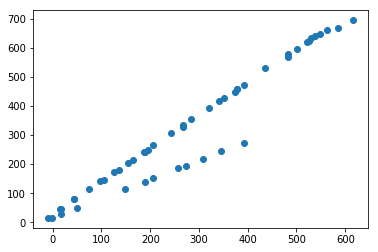

In [3]:
y_head = []
for x in cp :
    predict = w*x +b
    y_head.append(predict)
    
plt.scatter(y_head, newcp)
plt.show()

In [4]:
zip(y_head,newcp)

[(615.21935441542075, 694),
 (585.1724480002033, 669),
 (563.47190447810181, 659),
 (538.43281579875395, 640),
 (378.18264825092751, 457),
 (189.55484686650667, 243),
 (-9.0885899896532614, 15),
 (15.950498689694626, 47),
 (14.281226111071433, 47),
 (242.97156938244885, 305),
 (164.51575818715878, 213),
 (530.086452905638, 633),
 (194.56266460237626, 247),
 (74.375038941506375, 113),
 (44.328132526288911, 79),
 (126.12248887882535, 173),
 (206.2475726527386, 265),
 (525.0786351697684, 624),
 (521.74009001252205, 619),
 (268.01065806179679, 327),
 (136.13812435056451, 181),
 (97.74485504223108, 141),
 (186.21630170926031, 241),
 (104.42194535672385, 146),
 (374.84410309368104, 448),
 (434.93791592411606, 530),
 (319.75810799911574, 393),
 (268.01065806179679, 335),
 (501.70881906904367, 594),
 (483.34682070418864, 567),
 (481.67754812556541, 579),
 (378.18264825092751, 459),
 (391.53682887991306, 471),
 (351.47428699295642, 428),
 (341.45865152121723, 418),
 (283.03411126940546, 354),
 